In [0]:
#Functions
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn.model_selection import train_test_split # to split off training and test sets
from sklearn import preprocessing  # for standardizing the data
from sklearn import metrics  # Useful for creating confusion matrices
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflow
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.metrics import accuracy_score #accuracy score for random forest 
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import r2_score #for 

# Some useful functions we'll be needing later
Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential
Dropout = keras.layers.Dropout
LeakyReLU = keras.layers.LeakyReLU
# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

#Red Wine Data Preparation

In [2]:
#The Irvine Red Wine Data

file_id_red = '1at6g_c-0tizPJb8--grJYgLOOQWZ15in'
link_red =  'https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url_red = link_red.format(FILE_ID = file_id_red)

data_red = pd.read_csv(csv_url_red, sep=";")

print('red wine shape = ', data_red.shape)
data_red.info()

red wine shape =  (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data_red['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

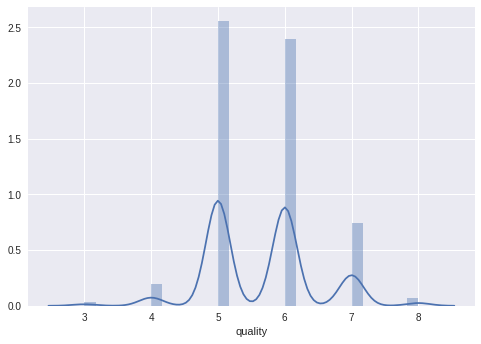

In [4]:
sns.distplot(data_red['quality'])

In [5]:
np.where(data_red['quality'] == 3)

(array([ 459,  517,  690,  832,  899, 1299, 1374, 1469, 1478, 1505]),)

In [6]:
np.where(data_red['quality'] == 8)

(array([ 267,  278,  390,  440,  455,  481,  495,  498,  588,  828, 1061,
        1090, 1120, 1202, 1269, 1403, 1449, 1549]),)

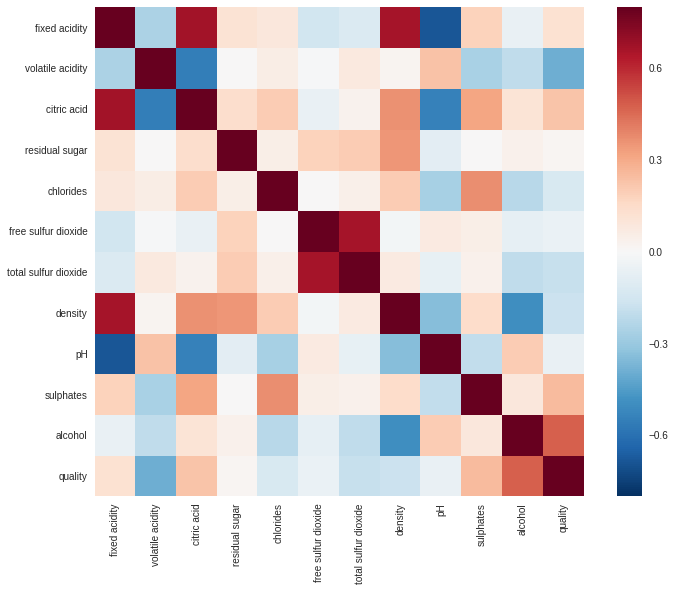

In [7]:
corrmat = data_red.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

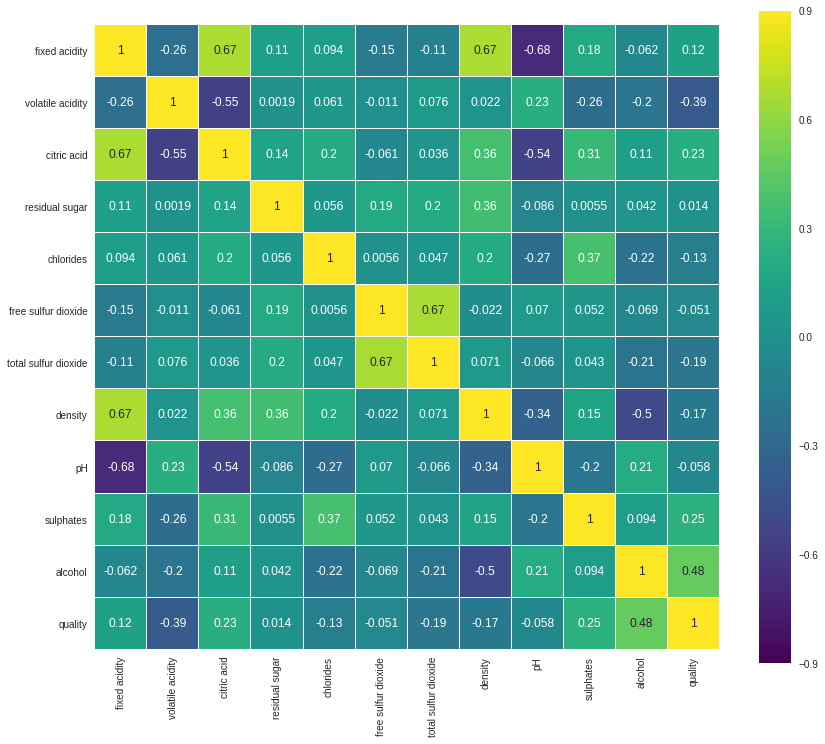

In [8]:
cols = data_red.columns
      
cm = np.corrcoef(data_red.values.T)
f , ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, 
            vmax = .9, 
            linewidths = 0.01, 
            square = True, 
            annot = True, 
            cmap = 'viridis',
            linecolor = "white", 
            xticklabels = cols.values, 
            annot_kws = {'size': 12}, 
            yticklabels = cols.values)

In [0]:
data_red = data_red.drop(columns=['free sulfur dioxide', 'pH', 'residual sugar'])

In [10]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


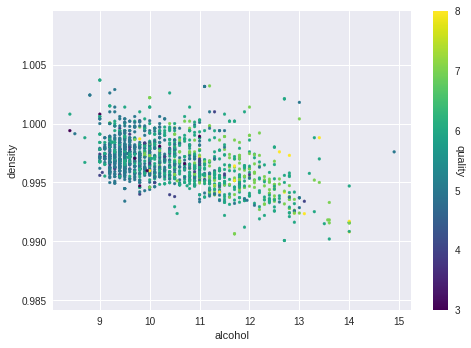

In [11]:
from matplotlib.colors import ListedColormap as colormap

plt.scatter(x = 'alcohol', 
            y = 'density', 
            c = 'quality', 
            data = data_red,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('density')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

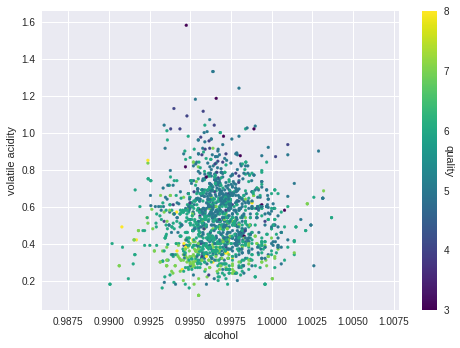

In [12]:
from matplotlib.colors import ListedColormap as colormap

plt.scatter(x = 'density', 
            y = 'volatile acidity', 
            c = 'quality', 
            data = data_red,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

In [13]:
np.where(data_red['volatile acidity'] > 1.5)

(array([1299]),)

In [14]:
np.where(data_red['alcohol'] > 14)

(array([652]),)

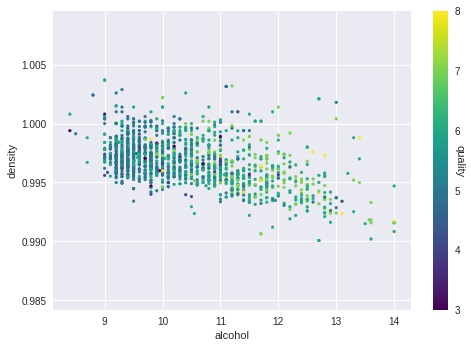

In [15]:
data_red = data_red.drop(list(np.where( (data_red['alcohol'] > 14) | (data_red['volatile acidity'] > 1.2) )[0]), axis=0)
plt.scatter(x = 'alcohol', 
            y = 'density', 
            c = 'quality', 
            data = data_red,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('density')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()


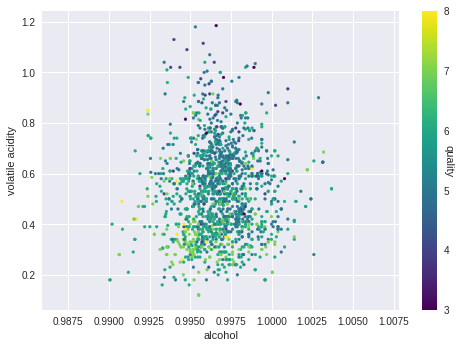

In [16]:
plt.scatter(x = 'density', 
            y = 'volatile acidity', 
            c = 'quality', 
            data = data_red,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

In [0]:
#z-transform all input variables
data_red['A'] = (data_red['fixed acidity']-data_red['fixed acidity'].mean())/data_red['fixed acidity'].std()
data_red['B'] = (data_red['volatile acidity']-data_red['volatile acidity'].mean())/data_red['volatile acidity'].std()
data_red['C'] = (data_red['citric acid']-data_red['citric acid'].mean())/data_red['citric acid'].std()
data_red['D'] = (data_red['chlorides']-data_red['chlorides'].mean())/data_red['chlorides'].std()
data_red['E'] = (data_red['total sulfur dioxide']-data_red['total sulfur dioxide'].mean())/data_red['total sulfur dioxide'].std()
data_red['F'] = (data_red['density']-data_red['density'].mean())/data_red['density'].std()
data_red['G'] = (data_red['sulphates']-data_red['sulphates'].mean())/data_red['sulphates'].std()
data_red['H'] = (data_red['alcohol']-data_red['alcohol'].mean())/data_red['alcohol'].std()

In [18]:
#Split the data into training set and testing set
cols = data_red.columns.tolist()[9:]    # exclude quality column
X = data_red[cols]
y = data_red['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train.head()

,A,B,C,D,E,F,G,H
868,-0.874014,0.196338,-0.263245,-0.285283,-0.684545,-1.252921,0.953137,0.735313
835,-0.412372,0.799347,-0.880173,-0.455058,0.260556,-0.104297,-0.876350,-1.055502
40,-0.585488,-0.435387,0.456503,-0.285283,1.236144,0.557353,1.012152,0.075539
1100,0.049270,-1.067112,0.764966,-0.327727,-0.318699,-1.496408,0.717074,1.866353
75,0.280091,-0.665105,1.896000,0.117932,-0.135777,0.980809,0.008886,0.075539


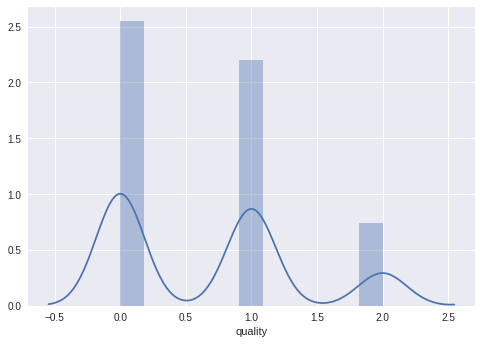

In [19]:
#Change our label to 0(LOW) 1(Medium) 2(High) quality 

def setQuality(x):
  if(x<=5):
      return 0
  elif (x==6):
      return 1
  else:
      return 2
  

y_test = y_test.apply(setQuality) 

y_train = y_train.apply(setQuality) 

sns.distplot(y_train) #before oversampling

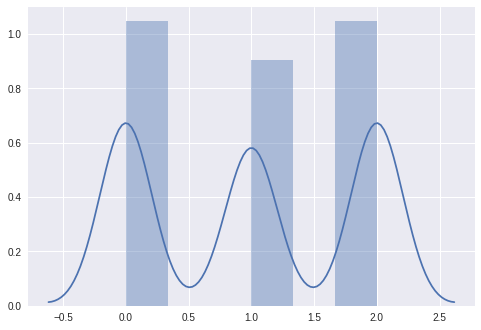

In [20]:
#oversampling 
ros = RandomOverSampler('minority')

X_train_res, y_train_res = ros.fit_sample(X_train, y_train)
sns.distplot(y_train_res) #equal training sample for each label 


#Red Wine Models Training

In [21]:
#Linear Regression

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

print('Training set R^2 =', lm.score(X_train, y_train))
print('Test set R^2 =', lm.score(X_test, y_test))

print('the coefficients =', lm.coef_)
print('the intercept =', lm.intercept_)


Training set R^2 = 0.39261999574073625
Test set R^2 = 0.35852169100358267
the coefficients = [ 0.07159874 -0.14166243 -0.01841843 -0.06195194 -0.07869928 -0.04346846
  0.14222027  0.27763771]
the intercept = 0.6729717173918092


In [22]:
#Gradient Descent

y = y_train
A = np.array(X_train['A'])
B = np.array(X_train['B']) 
C = np.array(X_train['C']) 
D = np.array(X_train['D']) 
E = np.array(X_train['E']) 
F = np.array(X_train['F']) 
G = np.array(X_train['G']) 
H = np.array(X_train['H']) 

A_test = np.array(X_test['A'])
B_test = np.array(X_test['B']) 
C_test = np.array(X_test['C']) 
D_test = np.array(X_test['D']) 
E_test = np.array(X_test['E']) 
F_test = np.array(X_test['F']) 
G_test = np.array(X_test['G']) 
H_test = np.array(X_test['H']) 
 


def delL(y, A, B, C, D, E, F, G, H, a, b, c, d, e, f, g, h, x):
    sum_y, sum_a, sum_b, sum_c, sum_d, sum_e, sum_f, sum_g, sum_h, sum_x = 0,0,0,0,0,0,0,0,0,0
    n = len(y)
    for y_i, a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i in zip(y, A, B, C, D, E, F, G, H):
      sum_a += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*a_i
      sum_b += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*b_i
      sum_c += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*c_i
      sum_d += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*d_i
      sum_e += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*e_i
      sum_f += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*f_i
      sum_g += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*g_i
      sum_h += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x)*h_i    
      sum_x += y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-x
    
    gradient_a = sum_a/(-n)
    gradient_b = sum_b/(-n)
    gradient_c = sum_c/(-n)
    gradient_d = sum_d/(-n)
    gradient_e = sum_e/(-n)
    gradient_f = sum_f/(-n)
    gradient_g = sum_g/(-n)
    gradient_h = sum_h/(-n)
    gradient_x = sum_x/(-n)
    
    return gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f, gradient_g, gradient_h, gradient_x

alpha = 0.05   # the learning rate
num_iterates = 500

# We'll start with the following initial "guess".
a, b, c, d, e, f, g, h, x = .01,.01,.01,.01,.01,.01,.01,.01,.01

for z in range(num_iterates):
    ga,gb,gc,gd,ge,gf,gg,gh,gx=delL(y,A,B,C,D,E,F,G,H,a,b,c,d,e,f,g,h,x)
    a,b,c,d,e,f,g,h,x = a-alpha*ga, b-alpha*gb, c-alpha*gc, d-alpha*gd, e-alpha*ge, f-alpha*gf, g-alpha*gg, h-alpha*gh, x-alpha*gx   

    
y_train_pred = []
for a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i in zip(A, B, C, D, E, F, G, H):
  y_train_pred.append (a*a_i+b*b_i+c*c_i+d*d_i+e*e_i+f*f_i+g*g_i+h*h_i+x)    
print(r2_score(y_train, y_train_pred))
# testing
y_pred = []
for a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i in zip(A_test, B_test, C_test, D_test, E_test, F_test, G_test, H_test):
  y_pred.append (a*a_i+b*b_i+c*c_i+d*d_i+e*e_i+f*f_i+g*g_i+h*h_i+x)
print(r2_score(y_test, y_pred)) 


0.3926196783587951
0.3584631809657416


Training accuracy
0.6403587443946188
Test accuracy
0.6033402922755741


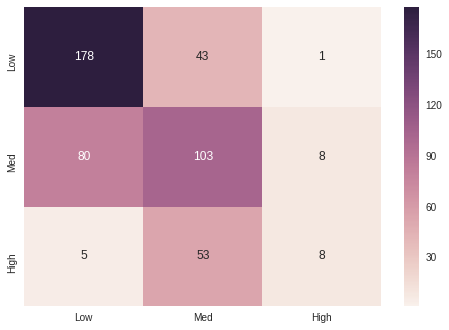

In [23]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

score = logisticRegr.score(X_train, y_train)
print("Training accuracy")
print(score)

score = logisticRegr.score(X_test, y_test)
print("Test accuracy")
print(score)

cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

In [24]:
#Neural Network: One hot encoding 

# One-hot encode the categorical labels.
train_hot_labels = to_categorical(y_train_res, num_classes = 3)
test_hot_labels = to_categorical(y_test, num_classes = 3)
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = 8))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'rmsprop',     
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train_res, train_hot_labels, 
                    validation_split = 0.25, 
                    epochs = 1000, 
                    batch_size = 75)

train_loss, train_acc = model.evaluate(X_train_res, train_hot_labels)
test_loss, test_acc = model.evaluate(X_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1110 samples, validate on 371 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1110/1110 [==============================] - 0s 215us/sample - loss: 1.0406 - acc: 0.4640 - val_loss: 1.4172 - val_acc: 0.0135
Epoch 2/1000
1110/1110 [==============================] - 0s 49us/sample - loss: 0.9514 - acc: 0.5234 - val_loss: 1.3691 - val_acc: 0.0135
Epoch 3/1000
1110/1110 [==============================] - 0s 46us/sample - loss: 0.9168 - acc: 0.5450 - val_loss: 1.3562 - val_acc: 0.0135
Epoch 4/1000
1110/1110 [==============================] - 0s 49us/sample - loss: 0.8783 - acc: 0.5712 - val_loss: 1.2631 - val_acc: 0.0593
Epoch 5/1000
1110/1110 [==============================] - 0s 48us/sample - loss: 0.8798 - acc: 0.5658 - val_loss: 1.2343 - val_acc: 0.2453
Epoch 6/1000
1110/1110

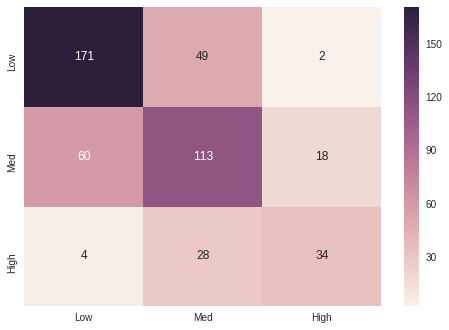

In [25]:
predicted = model.predict(X_test)

prediction =[]
for x in predicted:  #reverse the encoding
   prediction.append (np.argmax(x))

cm = pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')


Text(0.5, 1.0, 'Training and validation loss')

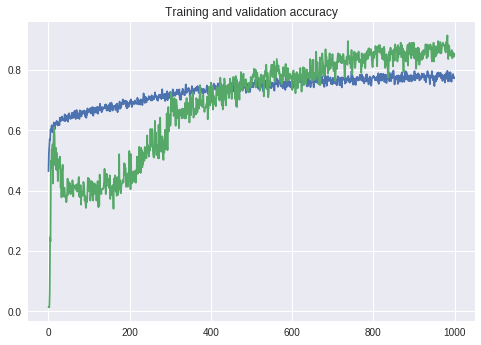

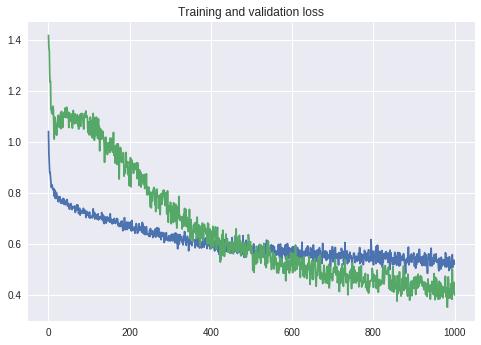

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [27]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train_res, y_train_res)

predicted_train = rf.predict(X_train)
train_accuracy =accuracy_score(y_train, predicted_train)
print("training accuracy: ")
print(train_accuracy)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

training accuracy: 
1.0
Out-of-bag score estimate: 0.816
Mean accuracy score: 0.714


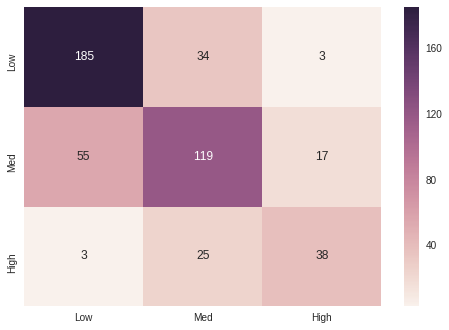

In [28]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

In [29]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_features = 'log2',
                                     n_estimators = 100,
                                     learning_rate = 0.03,
                                     max_depth = 11)
                                     
GBC.fit(X_train_res, y_train_res)
print("training accuracy: ")
print(GBC.score(X_train,y_train))
print("test accuracy: ")
print(GBC.score(X_test,y_test))

GBC.feature_importances_ 


training accuracy: 
1.0
test accuracy: 
0.7056367432150313


array([0.09292005, 0.12458949, 0.0989336 , 0.08999058, 0.12441025,
       0.10801072, 0.14545706, 0.21568825])

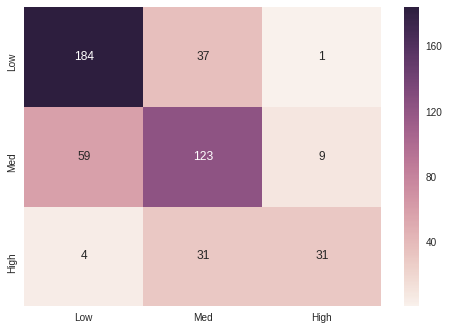

In [30]:
from sklearn.metrics import confusion_matrix
predicted = GBC.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

#White Wine Data Preparation


In [31]:
#The Irvine White Wine Data

file_id_white = '1w-mPWRRuEqEIWKODD30x-PhGQDGkjHv4'
link_white =  'https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url_white = link_white.format(FILE_ID = file_id_white)

data_white = pd.read_csv(csv_url_white, sep=";")

print('white wine shape = ', data_white.shape)
data_white.info()

white wine shape =  (4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
data_white['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

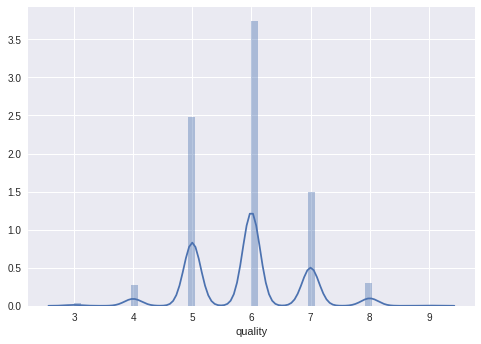

In [33]:
sns.distplot(data_white['quality'])

In [34]:
np.where(data_white['quality'] == 9)

(array([ 774,  820,  827,  876, 1605]),)

In [35]:
np.where(data_white['quality'] == 3)

(array([ 251,  253,  294,  445,  740,  873, 1034, 1229, 1417, 1484, 1688,
        1931, 2050, 2373, 3087, 3265, 3307, 3409, 3810, 4745]),)

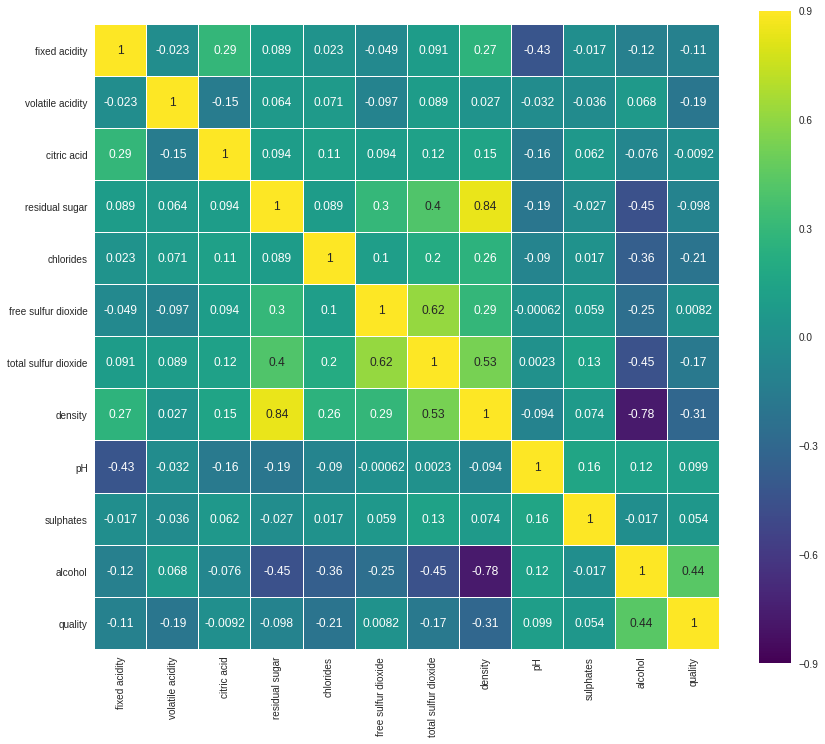

In [36]:
cols = data_white.columns
      
cm = np.corrcoef(data_white.values.T)
f , ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, 
            vmax = .9, 
            linewidths = 0.01, 
            square = True, 
            annot = True, 
            cmap = 'viridis',
            linecolor = "white", 
            xticklabels = cols.values, 
            annot_kws = {'size': 12}, 
            yticklabels = cols.values)

In [0]:
data_white = data_white.drop(columns=['citric acid', 'free sulfur dioxide'])


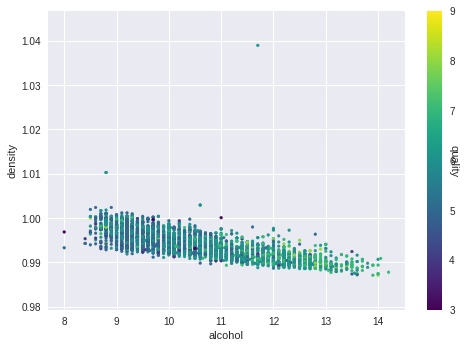

In [38]:
plt.scatter(x = 'alcohol', 
            y = 'density', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('density')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

In [39]:
np.where(data_white['density'] > 1.01)

(array([1653, 1663, 2781]),)

In [40]:
np.where(data_white['alcohol'] < 8.2) 


(array([2625, 3265]),)

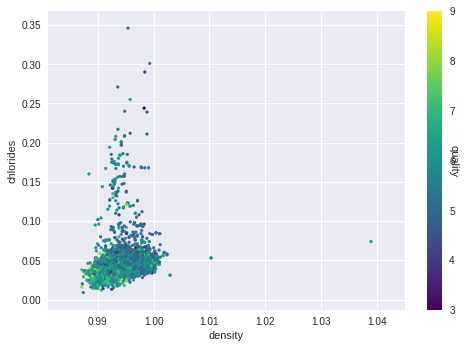

In [41]:
plt.scatter(x = 'density', 
            y = 'chlorides', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('density')
plt.ylabel('chlorides')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

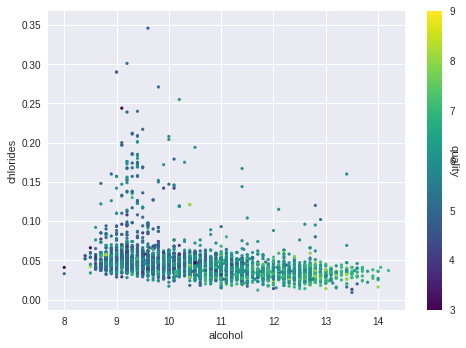

In [42]:
plt.scatter(x = 'alcohol', 
            y = 'chlorides', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('chlorides')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

In [43]:
np.where(data_white['chlorides'] > 0.30)

(array([ 484, 1217]),)

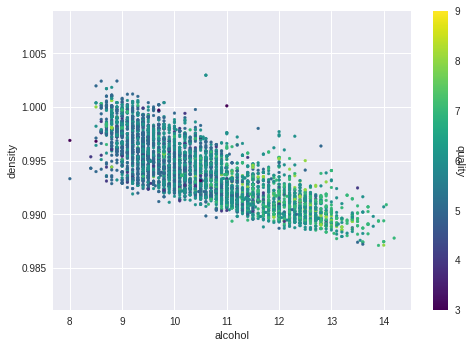

In [44]:
data_white = data_white.drop(list(np.where( (data_white['density'] > 1.01) | (data_white['chlorides'] > 0.23) | (data_white['fixed acidity'] > 12) ))[0], axis=0)
plt.scatter(x = 'alcohol', 
            y = 'density', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('alcohol')
plt.ylabel('density')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()



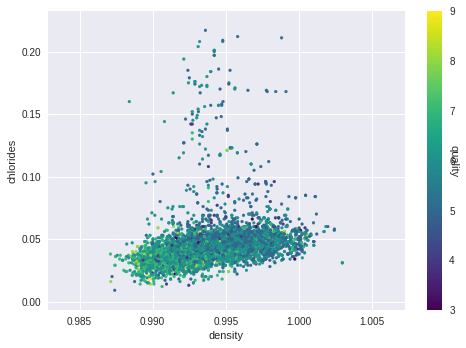

In [45]:
plt.scatter(x = 'density', 
            y = 'chlorides', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('density')
plt.ylabel('chlorides')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

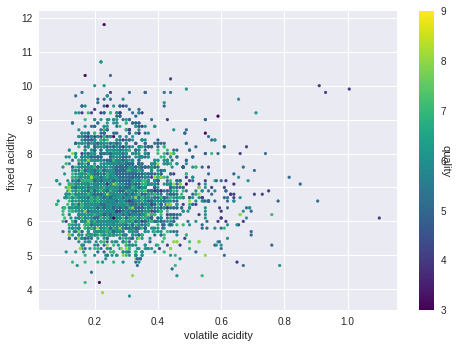

In [46]:
plt.scatter(x = 'volatile acidity', 
            y = 'fixed acidity', 
            c = 'quality', 
            data = data_white,
            cmap = 'viridis',
            s = 8,
           )   # dot size
plt.xlabel('volatile acidity')
plt.ylabel('fixed acidity')
cbar = plt.colorbar()
cbar.set_label('quality', rotation=270)
plt.show()

In [0]:
#z-transform all input variables
data_white['A'] = (data_white['fixed acidity']-data_white['fixed acidity'].mean())/data_white['fixed acidity'].std()
data_white['B'] = (data_white['volatile acidity']-data_white['volatile acidity'].mean())/data_white['volatile acidity'].std()
data_white['C'] = (data_white['residual sugar']-data_white['residual sugar'].mean())/data_white['residual sugar'].std()
data_white['D'] = (data_white['chlorides']-data_white['chlorides'].mean())/data_white['chlorides'].std()
data_white['E'] = (data_white['total sulfur dioxide']-data_white['total sulfur dioxide'].mean())/data_white['total sulfur dioxide'].std()
data_white['F'] = (data_white['density']-data_white['density'].mean())/data_white['density'].std()
data_white['G'] = (data_white['pH']-data_white['pH'].mean())/data_white['pH'].std()
data_white['H'] = (data_white['sulphates']-data_white['sulphates'].mean())/data_white['sulphates'].std()
data_white['I'] = (data_white['alcohol']-data_white['alcohol'].mean())/data_white['alcohol'].std()

In [48]:
#Split the data into training set and testing set
cols = data_white.columns.tolist()[10:]    # exclude quality column
X = data_white[cols]
y = data_white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)

X_train.head()

,A,B,C,D,E,F,G,H,I
2684,-0.301031,-0.677899,-0.917556,-0.980230,-0.241423,-0.750159,1.202399,-0.085173,0.555514
4662,0.534842,-1.078022,0.368488,-0.879139,-0.641697,-0.443536,-0.320940,-0.698712,1.530625
137,0.296021,0.922591,0.830660,-0.019862,0.394305,1.203274,-0.188475,-0.435766,-1.475969
2110,-0.420442,-0.577868,2.156893,0.232866,-0.005968,2.099028,0.738774,-1.049305,-1.394710
2020,1.012484,-0.177746,0.006788,0.232866,0.582669,-0.105905,0.010221,1.843092,0.799292


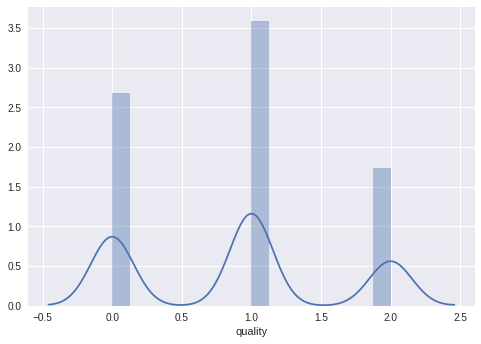

In [49]:
#Change our label to 0(LOW) 1(Medium) 2(High) quality 

def setQuality(x):
  if(x<=5):
      return 0
  elif (x==6):
      return 1
  else:
      return 2 
  

y_test = y_test.apply(setQuality) 

y_train = y_train.apply(setQuality) 

sns.distplot(y_train) 

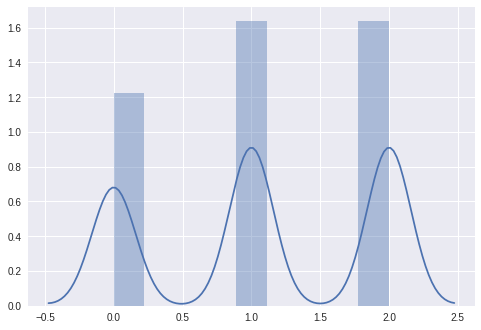

In [50]:
#oversampling 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler('minority')

X_train_res, y_train_res = ros.fit_sample(X_train, y_train)

sns.distplot(y_train_res) 

#White Wine Models Training

In [51]:
#Linear Regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

print('Training set R^2 =', lm.score(X_train, y_train))
print('Test set R^2 =', lm.score(X_test, y_test))

print('the coefficients =', lm.coef_)
print('the intercept =', lm.intercept_)

Training set R^2 = 0.30729404334298693
Test set R^2 = 0.26474598354296974
the coefficients = [ 0.08637035 -0.15280962  0.39091164 -0.00763742  0.0229315  -0.49367918
  0.10945886  0.0709312   0.15072689]
the intercept = 0.8832538511696589


In [52]:
#Gradient Descent

y = y_train
A = np.array(X_train['A'])
B = np.array(X_train['B']) 
C = np.array(X_train['C']) 
D = np.array(X_train['D']) 
E = np.array(X_train['E']) 
F = np.array(X_train['F']) 
G = np.array(X_train['G']) 
H = np.array(X_train['H']) 
I = np.array(X_train['I']) 

A_test = np.array(X_test['A'])
B_test = np.array(X_test['B']) 
C_test = np.array(X_test['C']) 
D_test = np.array(X_test['D']) 
E_test = np.array(X_test['E']) 
F_test = np.array(X_test['F']) 
G_test = np.array(X_test['G']) 
H_test = np.array(X_test['H']) 
I_test = np.array(X_test['I']) 

def delL(y, A, B, C, D, E, F, G, H, I, a, b, c, d, e, f, g, h, i, x):
    sum_y, sum_a, sum_b, sum_c, sum_d, sum_e, sum_f, sum_g, sum_h, sum_i, sum_x = 0,0,0,0,0,0,0,0,0,0,0
    n = len(y)
    for y_i, a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i, i_i in zip(y, A, B, C, D, E, F, G, H, I):
      sum_a += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*a_i
      sum_b += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*b_i
      sum_c += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*c_i
      sum_d += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*d_i
      sum_e += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*e_i
      sum_f += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*f_i
      sum_g += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*g_i
      sum_h += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*h_i
      sum_i += (y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x)*i_i    
      sum_x += y_i-a*a_i-b*b_i-c*c_i-d*d_i-e*e_i-f*f_i-g*g_i-h*h_i-i*i_i-x
    
    gradient_a = sum_a/(-n)
    gradient_b = sum_b/(-n)
    gradient_c = sum_c/(-n)
    gradient_d = sum_d/(-n)
    gradient_e = sum_e/(-n)
    gradient_f = sum_f/(-n)
    gradient_g = sum_g/(-n)
    gradient_h = sum_h/(-n)
    gradient_i = sum_i/(-n)
    gradient_x = sum_x/(-n)
    
    return gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f, gradient_g, gradient_h, gradient_i, gradient_x

alpha = 0.05   # the learning rate
num_iterates = 500

# We'll start with the following initial "guess".
a, b, c, d, e, f, g, h, i, x = .01,.01,.01,.01,.01,.01,.01,.01,.01,.01

for z in range(num_iterates):
    ga,gb,gc,gd,ge,gf,gg,gh,gi,gx=delL(y,A,B,C,D,E,F,G,H,I,a,b,c,d,e,f,g,h,i,x)
    a,b,c,d,e,f,g,h,i,x = a-alpha*ga, b-alpha*gb, c-alpha*gc, d-alpha*gd, e-alpha*ge, f-alpha*gf, g-alpha*gg, h-alpha*gh, i-alpha*gi, x-alpha*gx   

y_train_pred = []
for a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i, i_i in zip(A, B, C, D, E, F, G, H, I):
  y_train_pred.append (a*a_i+b*b_i+c*c_i+d*d_i+e*e_i+f*f_i+g*g_i+h*h_i+x)    

print("training accuracy: ")  
print(r2_score(y_train, y_train_pred))    

    
# testing
from sklearn.metrics import r2_score
y_pred = []
for a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i, i_i in zip(A_test, B_test, C_test, D_test, E_test, F_test, G_test, H_test, I_test):
  y_pred.append (a*a_i+b*b_i+c*c_i+d*d_i+e*e_i+f*f_i+g*g_i+h*h_i+i*i_i+x)
print("test accuracy: ")
print(r2_score(y_test, y_pred)) 


training accuracy: 
0.14535665256828412
test accuracy: 
0.2569496889206029


training accuracy: 
0.5798245614035088
test accuracy: 
0.5702592087312415


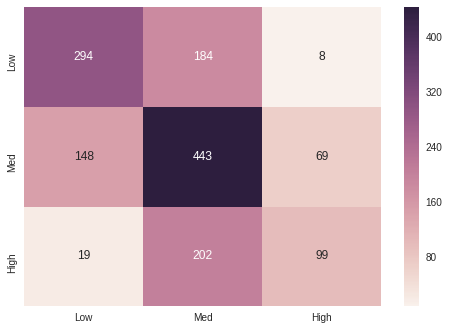

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

score = logisticRegr.score(X_train, y_train)
print("training accuracy: ")
print(score)

score = logisticRegr.score(X_test, y_test)
print("test accuracy: ")
print(score)

cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

In [54]:
#Neural Network: One hot encoding
# One-hot encode the categorical labels.
train_hot_labels = to_categorical(y_train_res, num_classes = 3)
test_hot_labels = to_categorical(y_test, num_classes = 3)

model = Sequential()

model.add(Dense(100, activation='relu', input_dim = 9))

model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',     
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train_res, train_hot_labels, 
                    validation_split = 0.25, 
                    epochs = 1000, 
                    batch_size = 210)

train_loss, train_acc = model.evaluate(X_train_res, train_hot_labels)
test_loss, test_acc = model.evaluate(X_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Train on 3159 samples, validate on 1054 samples
Epoch 1/1000
3159/3159 [==============================] - 0s 101us/sample - loss: 1.1068 - acc: 0.4030 - val_loss: 1.2277 - val_acc: 0.1271
Epoch 2/1000
3159/3159 [==============================] - 0s 31us/sample - loss: 1.0538 - acc: 0.4413 - val_loss: 1.1825 - val_acc: 0.1252
Epoch 3/1000
3159/3159 [==============================] - 0s 29us/sample - loss: 1.0385 - acc: 0.4520 - val_loss: 1.1529 - val_acc: 0.1727
Epoch 4/1000
3159/3159 [==============================] - 0s 31us/sample - loss: 1.0203 - acc: 0.4657 - val_loss: 1.1276 - val_acc: 0.3226
Epoch 5/1000
3159/3159 [==============================] - 0s 31us/sample - loss: 1.0086 - acc: 0.4758 - val_loss: 1.0855 - val_acc: 0.3577
Epoch 6/1000
3159/3159 [==============================] - 0s 31us/sample - loss: 0.9761 - acc: 0.4919 - val_loss: 1.0626 - val_acc: 0.4402
Epoch 7/1000
3159/3159 [==============================] - 0s 29us/sample - loss: 0.9577 - acc: 0.5071 - val_loss: 0.9

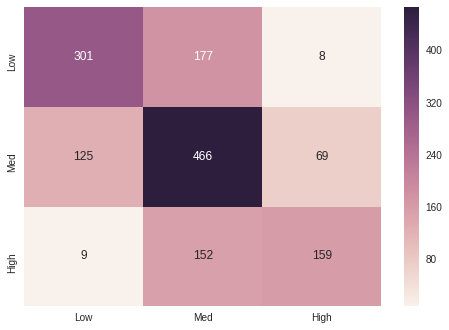

In [55]:
predicted = model.predict(X_test)

prediction =[]
for x in predicted:  #reverse the encoding
   prediction.append (np.argmax(x))

cm = pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

Text(0.5, 1.0, 'Training and validation loss')

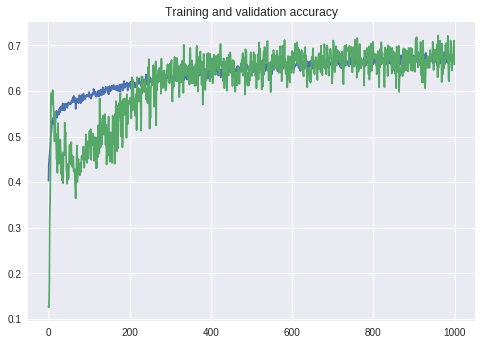

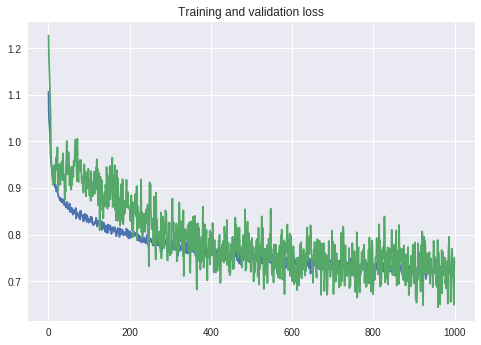

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


In [57]:
#RandomForest

rf = RandomForestClassifier(class_weight="balanced", n_estimators=100, oob_score=True)
rf.fit(X_train_res, y_train_res)

predicted_train = rf.predict(X_train)
train_accuracy =accuracy_score(y_train, predicted_train)
print("training accuracy: ")
print(train_accuracy)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

training accuracy: 
1.0
Out-of-bag score estimate: 0.78
Mean accuracy score: 0.705


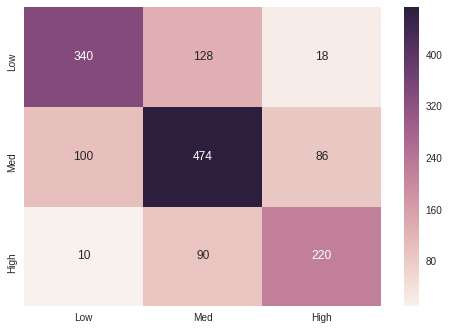

In [58]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')

In [59]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_features = 'log2',
                                     n_estimators = 100,
                                     learning_rate = 0.03,
                                     max_depth = 11)
                                     
GBC.fit(X_train_res, y_train_res)

print("training accuracy: ")
print(GBC.score(X_train_res,y_train_res))

print("test accuracy: ")
print(GBC.score(X_test,y_test))

GBC.feature_importances_  

training accuracy: 
0.9997626394493235
test accuracy: 
0.7107776261937244


array([0.08202482, 0.11864502, 0.10650915, 0.09777511, 0.10629653,
       0.14699355, 0.09460107, 0.08195566, 0.16519908])

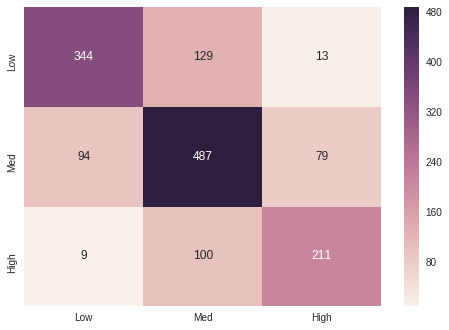

In [60]:
from sklearn.metrics import confusion_matrix
predicted = GBC.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Low','Med','High'], index=['Low','Med','High'])
sns.heatmap(cm, annot=True, fmt='g')